<a href="https://colab.research.google.com/github/SAIKUMAR-AI/Capstone-project/blob/main/SGEMM_GPU_Kernel_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune'). </u></b>

## <b> Problem Description </b>

### This data set measures the running time of a matrix-matrix product $A*B = C$, where all matrices have size 2048 x 2048, using a parameterizable SGEMM GPU kernel with 241600 possible parameter combinations. For each tested combination, 4 runs were performed and their results are reported as the 4 last columns. All times are measured in milliseconds*.

### There are 14 parameter, the first 10 are ordinal and can only take up to 4 different powers of two values, and the 4 last variables are binary. Out of 1327104 total parameter combinations, only 241600 are feasible (due to various kernel constraints). This data set contains the results for all these feasible combinations.

### The experiment was run on a desktop workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. We use the 'gemm_fast' kernel from the automatic OpenCL kernel tuning library 'CLTune' ([Web Link]).

#### * Note: for this kind of data sets it is usually better to work with the logarithm of the running times 


## <b> Data Description </b>

### <b>Attribute Information: </b>

### Independent variables:
* ### MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)
* ### KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)
* ### MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)
* ### MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)
* ### KWI: kernel loop unrolling factor: {2, 8} (integer)
* ### VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)
* ### STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)
* ### SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

### Output:
* ### Run1, Run2, Run3, Run4: performance times in milliseconds for 4 independent runs using the same parameters. They range between 13.25 and 3397.08.

# **Problem Statement**
Checking efficiency of SGEMM GPU kernel performance with the help of independent variables, (explanatory variables) giving some arithmetic calculation like matrices multiply with other matrix and it was measured by multiple runtime's how fast it was calculated.
  TO predict the dependent variables (response variables) from the actual values.
# **Business Goal**
After analysis on SGEMM GPU performance it will goto mass production and deployment state.  

# **Importing Libraries**
1. Pandas for data manipulation
2. Matplotlib & seaborn for Visulisation 
3. Numpy for effient operations
4. Scikit Learn for model training, optimizaion & calculation

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading**

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CapstoneProject/SGEMM GPU Kernel Performance/sgemm_product.csv')

# **Data Inspection**

In [ ]:
#first look of data
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
dataset.tail()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45
241599,128,128,32,32,32,32,32,8,4,4,1,1,1,1,17.94,17.79,17.77,17.77


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [ ]:

#Describing the dataset
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
NWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
KWG,241600.0,25.513113,7.855619,16.00,16.00,32.000,32.00,32.00
MDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
NDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
MDIMA,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
NDIMB,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
KWI,241600.0,5.000000,3.000006,2.00,2.00,5.000,8.00,8.00
VWM,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00
VWN,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00


In [ ]:
dataset.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

## **Handling Outliers and NaN Values**

In [ ]:
#Checking Null Values
dataset.isnull().sum()

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

## **Exploratory Data Analysis**

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Runtime'],
      dtype='object')

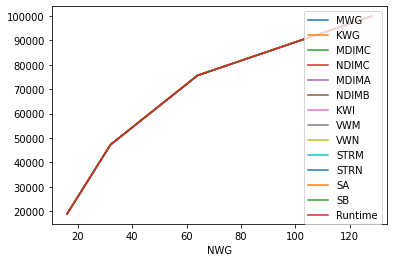

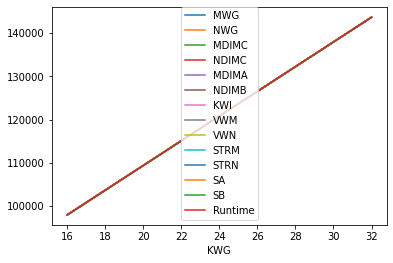

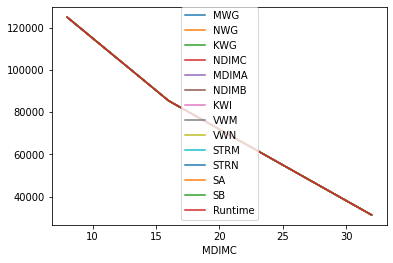

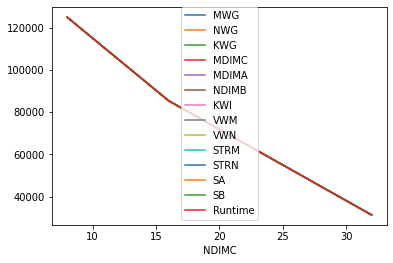

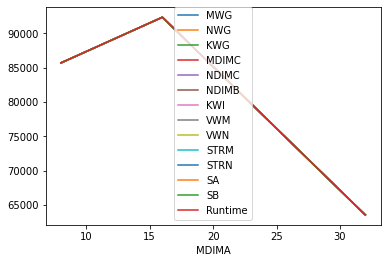

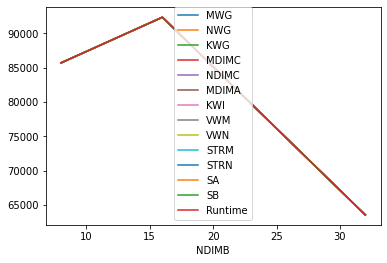

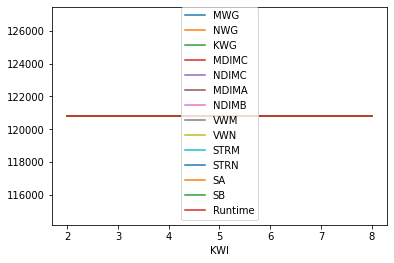

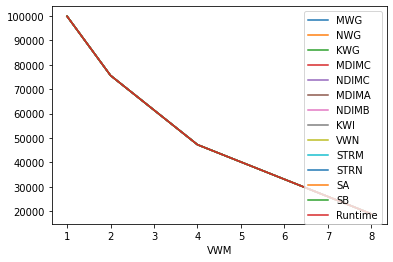

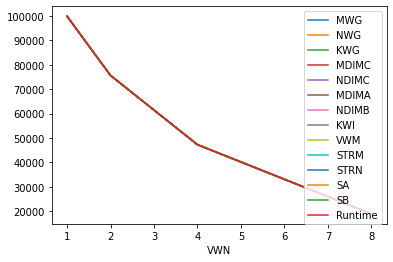

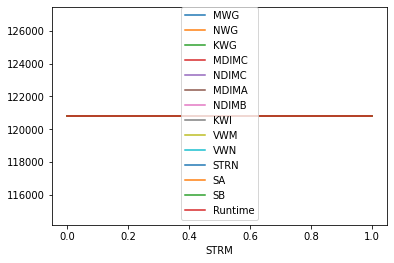

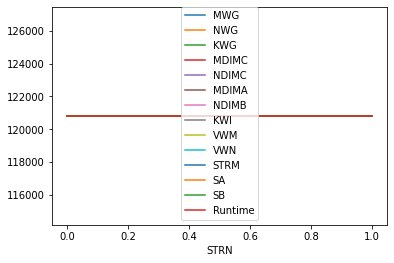

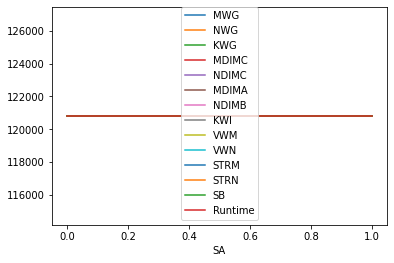

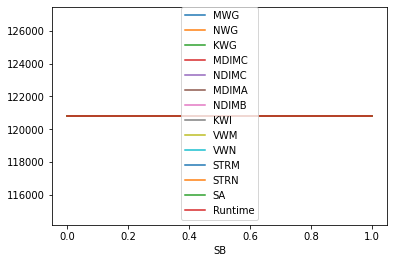

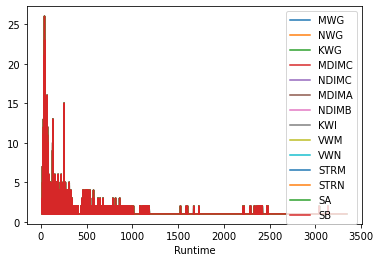

In [ ]:
for col in numeric_features[1:]:
  dataset.groupby(col).count().plot()

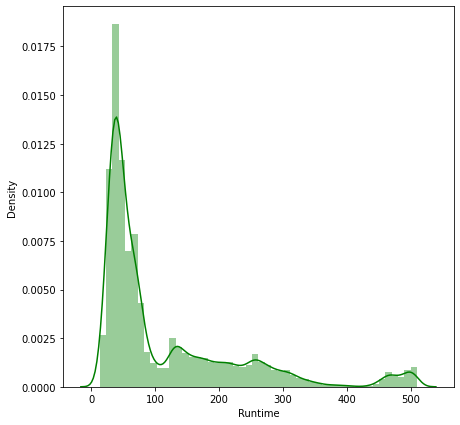

In [ ]:
#Dependent Variable 
# Runtime variable is mean of four Run's variable from dataset present in feature  engineer
plt.figure(figsize=(7,7))
sns.distplot(dataset['Runtime'], color='green')

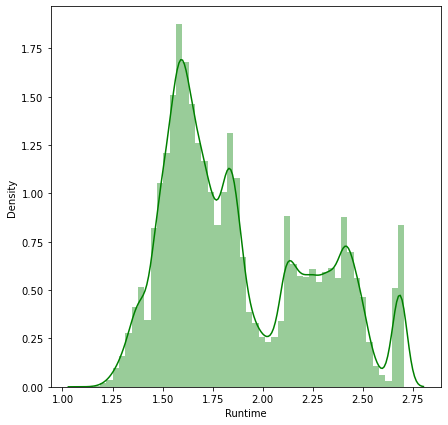

In [ ]:
#Dependent Variable 
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['Runtime']), color='green')

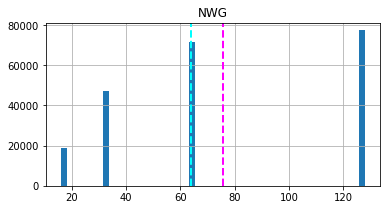

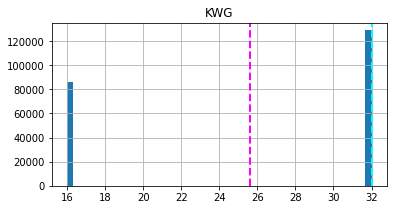

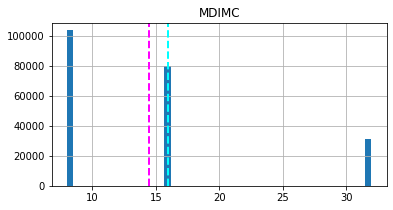

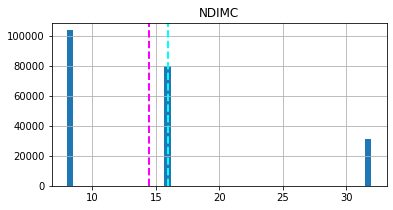

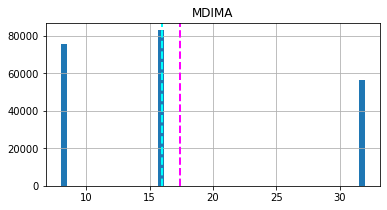

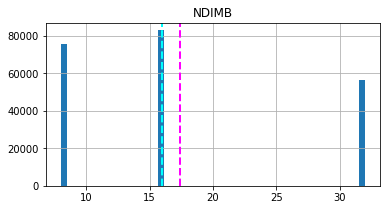

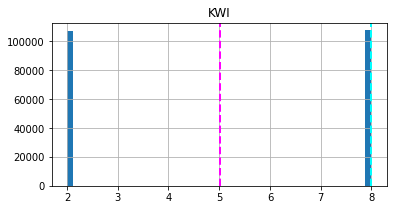

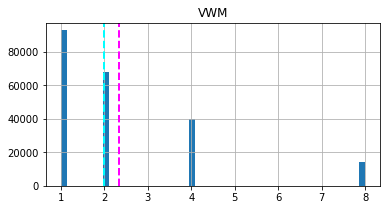

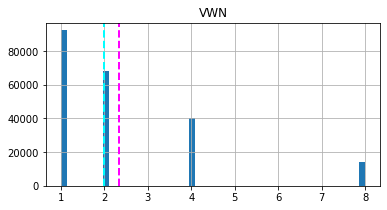

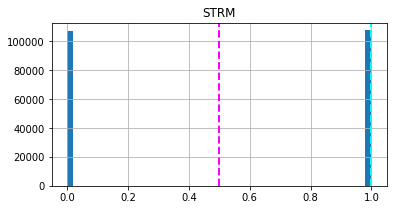

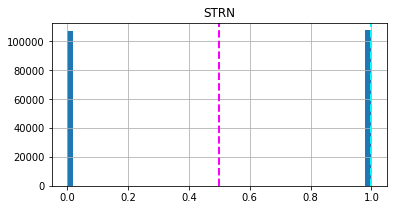

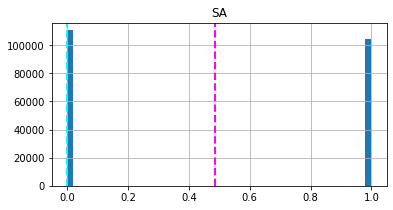

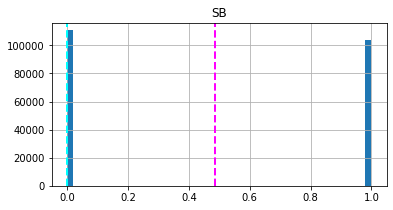

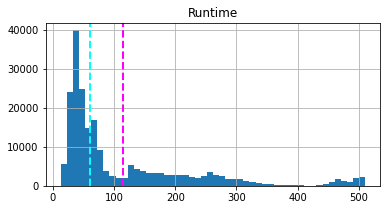

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

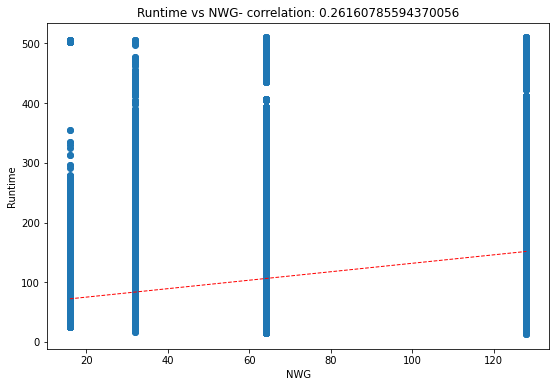

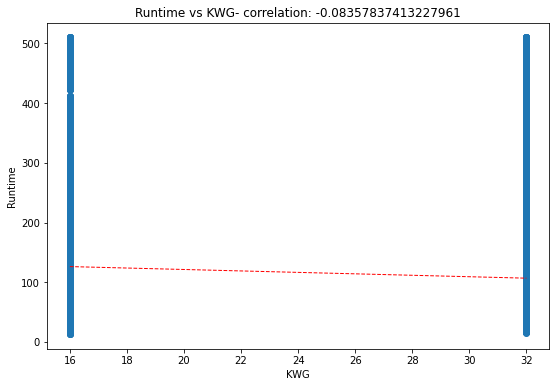

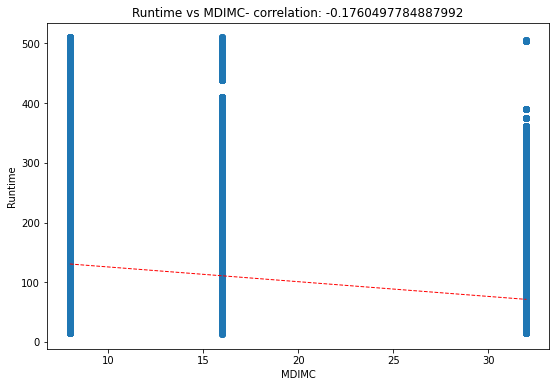

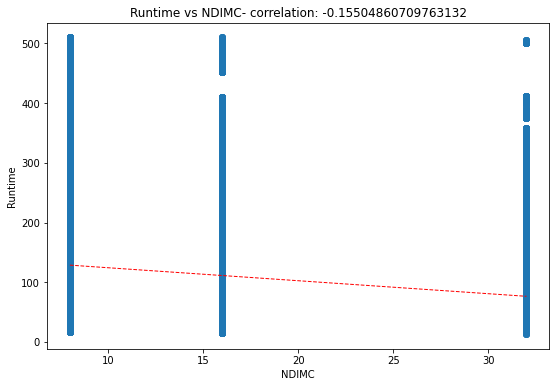

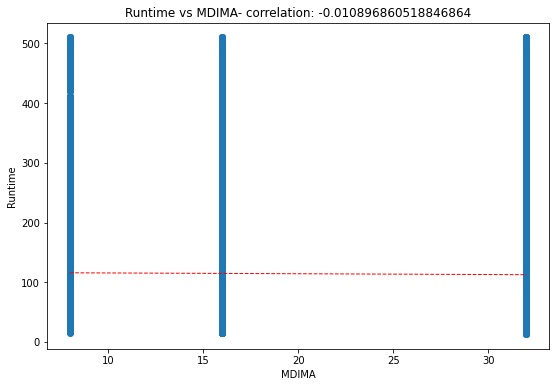

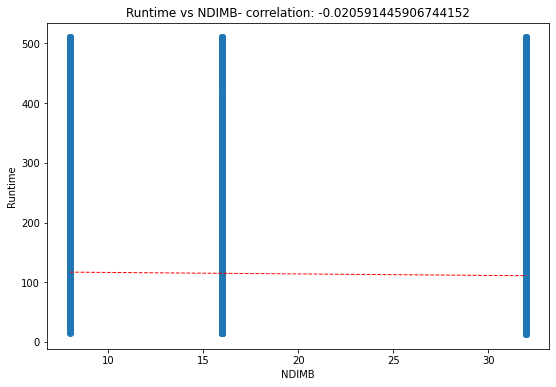

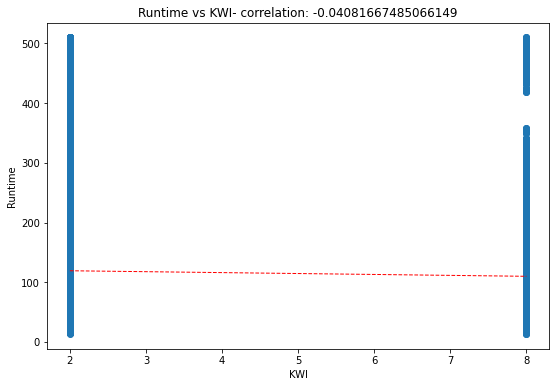

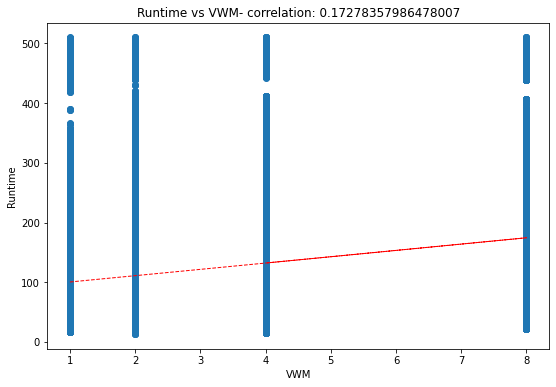

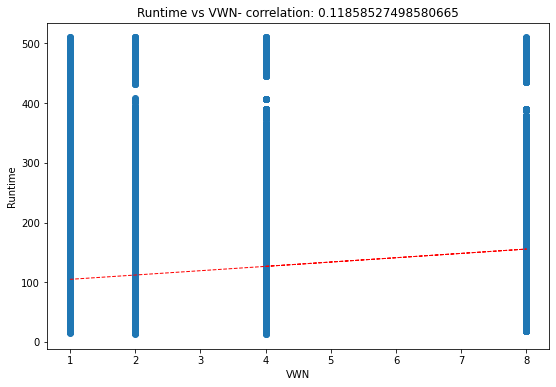

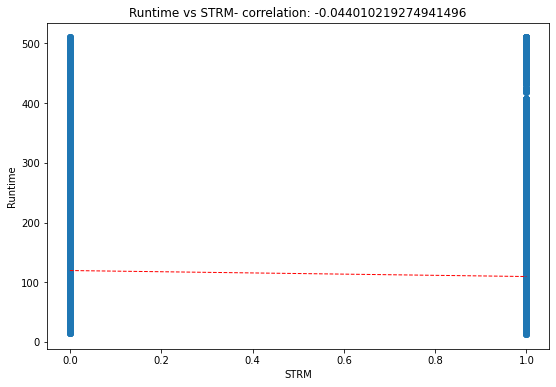

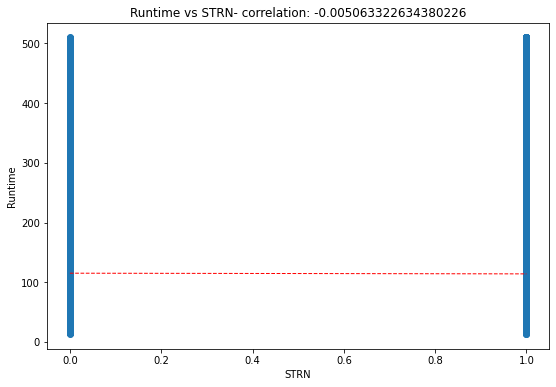

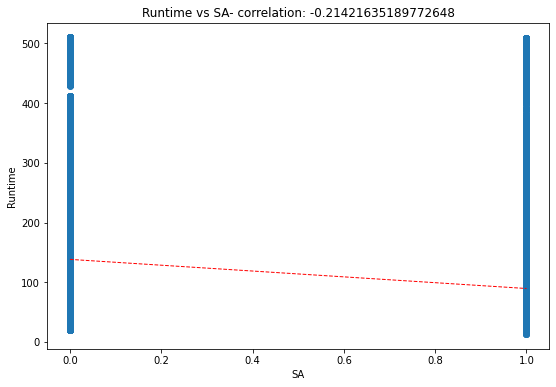

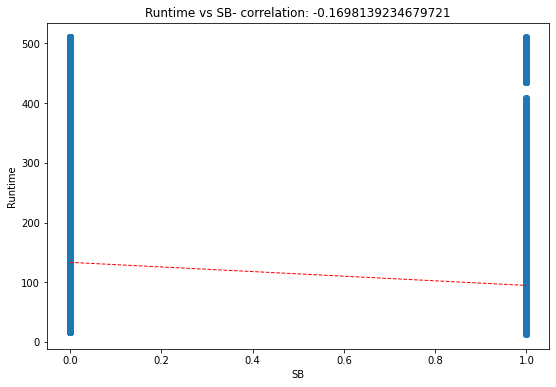

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Runtime']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Runtime')
    ax.set_title('Runtime vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Runtime'], 1)
    y_hat = np.poly1d(z)(dataset[col])


    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

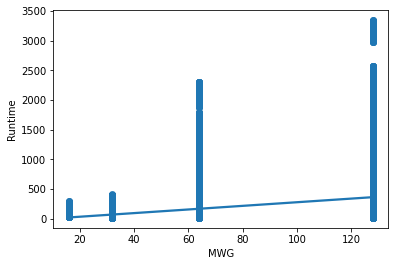

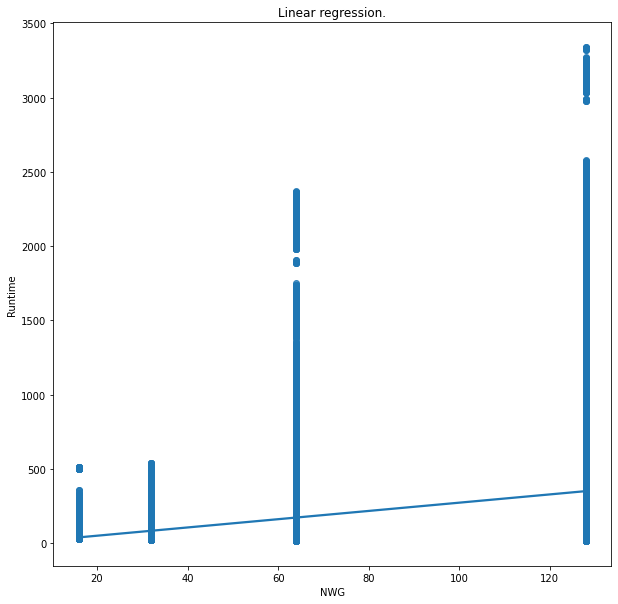

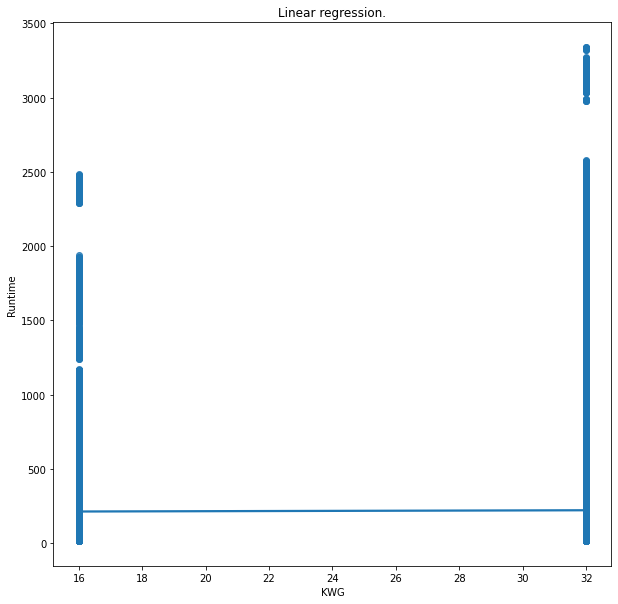

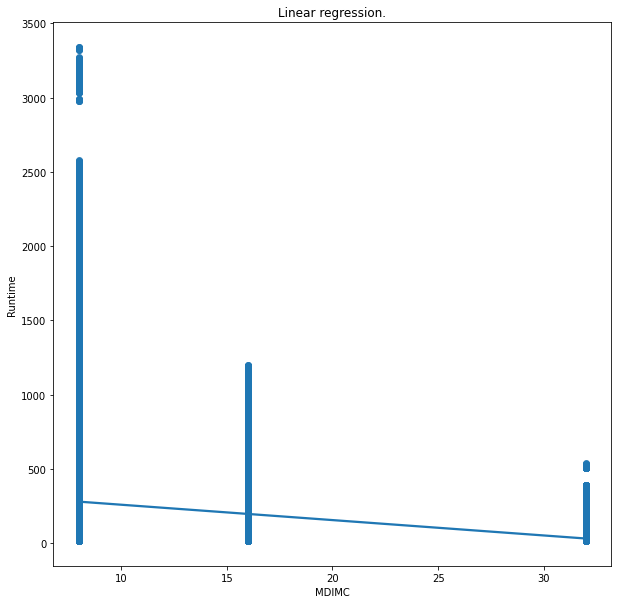

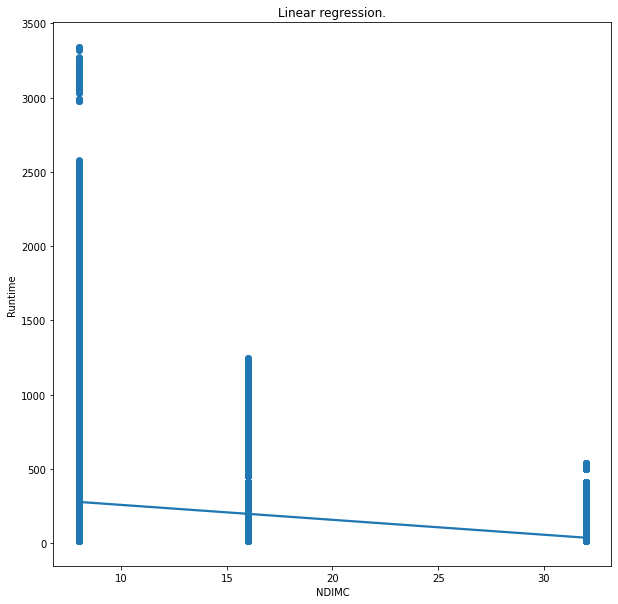

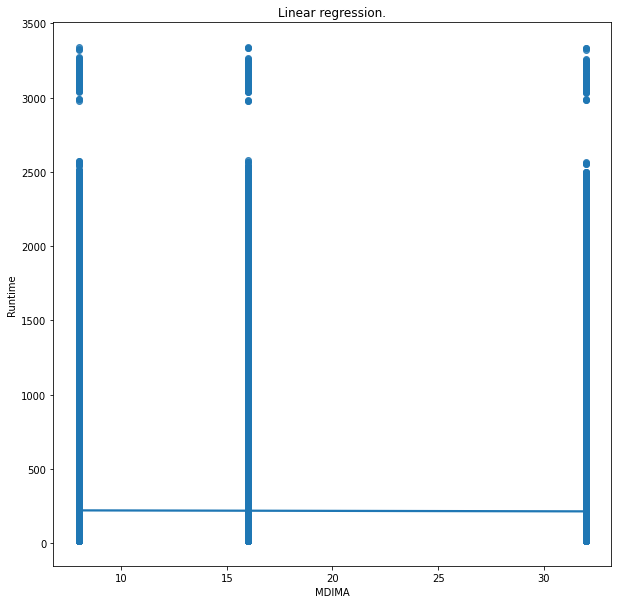

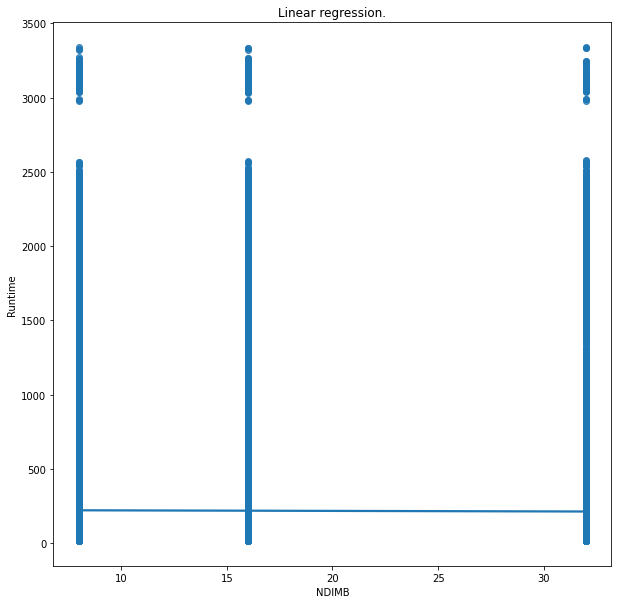

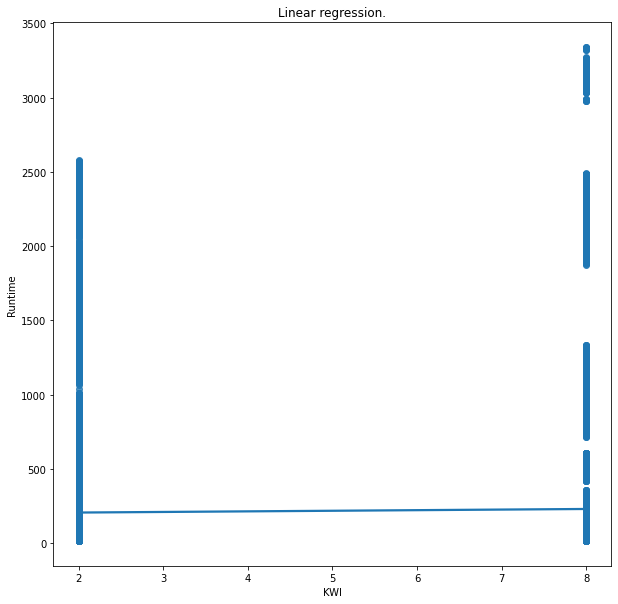

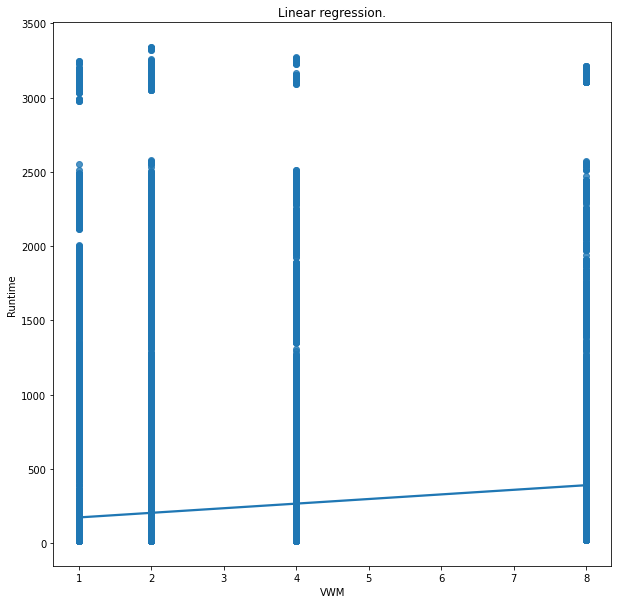

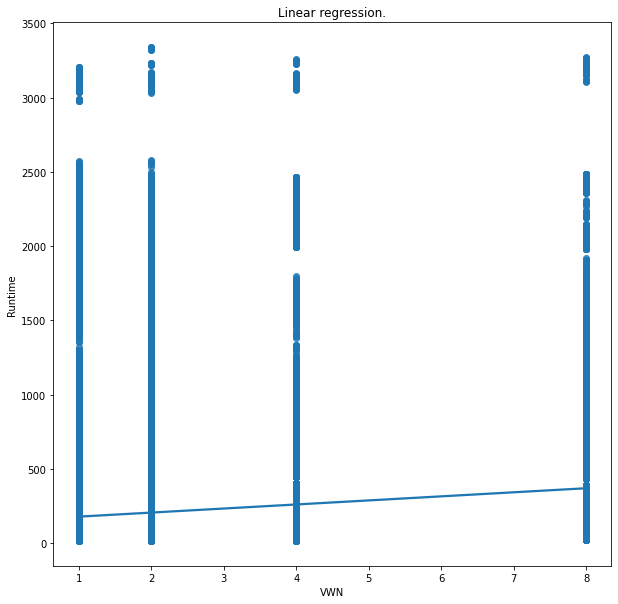

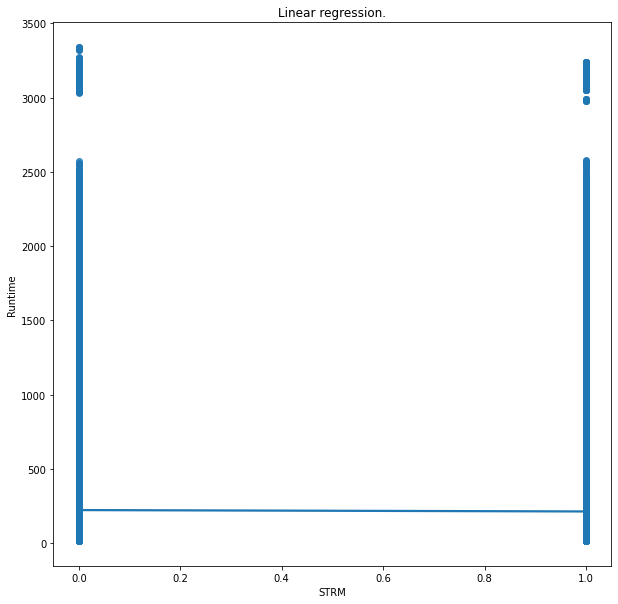

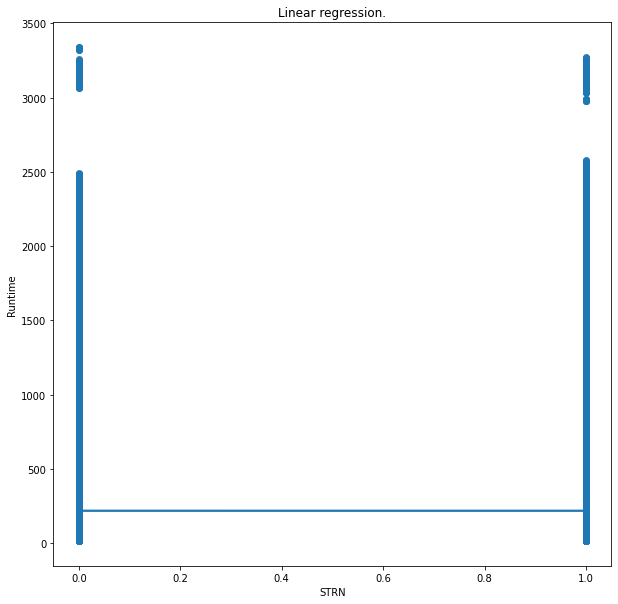

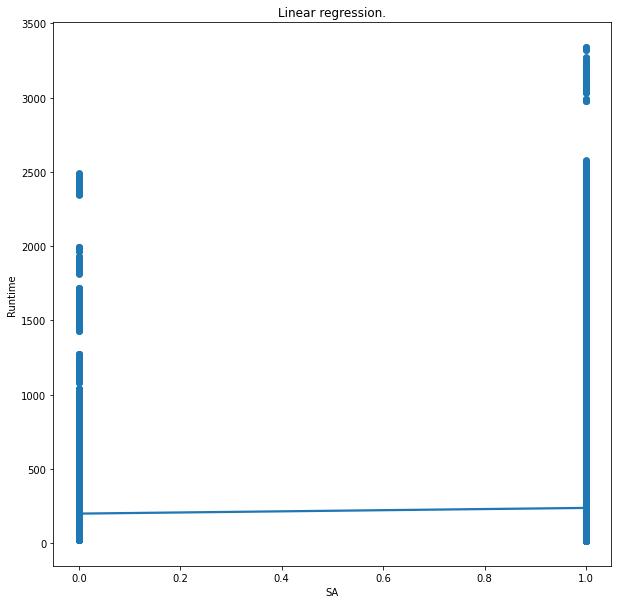

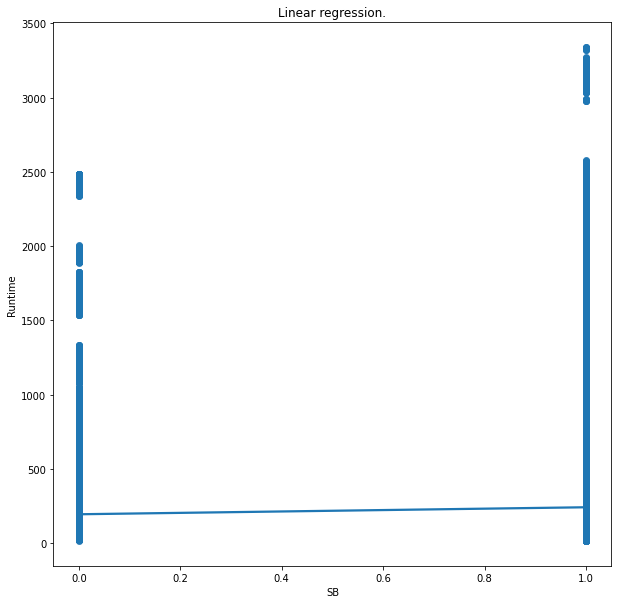

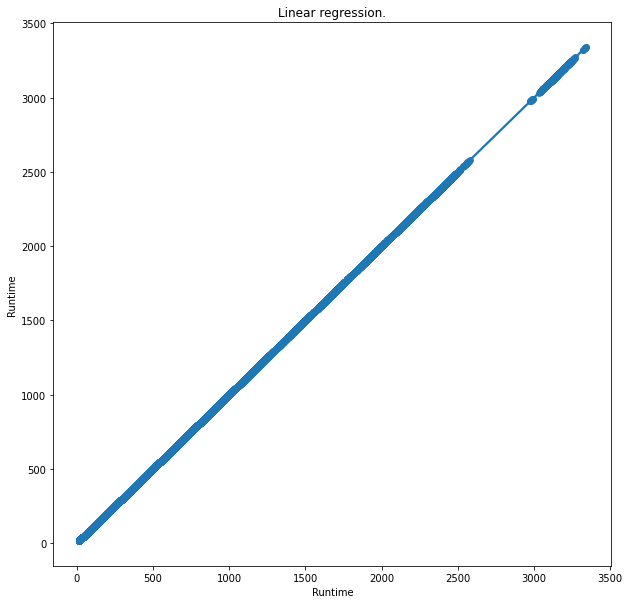

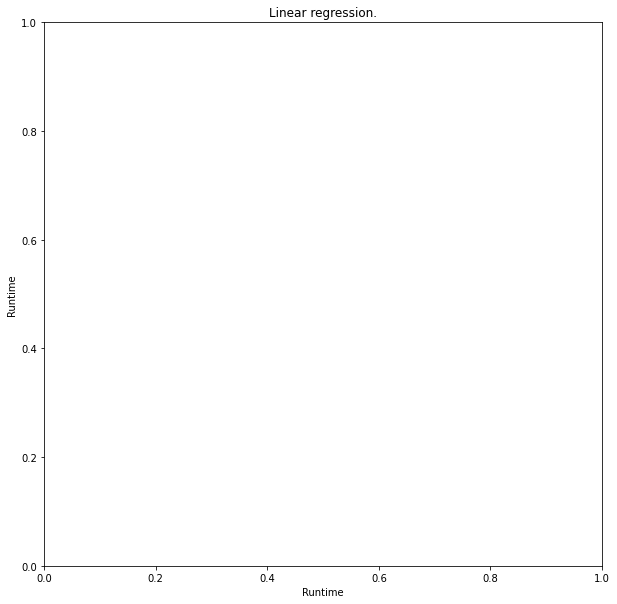

In [ ]:
for col in dataset[1:-2]:
  sns.regplot(x=dataset[col],y=dataset['Runtime'])
  plt.figure(figsize=(10,10))
  plt.title('Linear regression.')
  plt.xlabel(col)
  plt.ylabel('Runtime')


Text(0.5, 1.0, 'Variable Correlation')

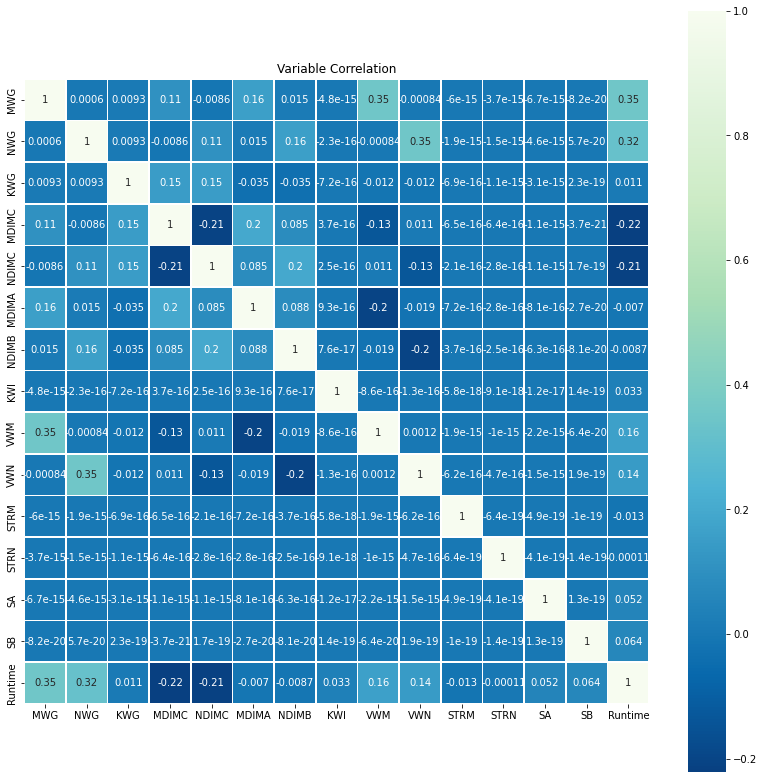

In [ ]:
#corelation
plt.figure(figsize=(14,14))
#sns.set(front_scale=1)
sns.heatmap(dataset.corr(),cmap='GnBu_r',annot=True, square=True, linewidths=.5);
plt.title('Variable Correlation')

## **Feature Engineer**

Observing the dataset of last four columns of individual data Run's (ms) measured variables are similar to eachother, lets take the mean of that four variables as a target variable

In [ ]:
#taking mean
dataset['Runtime'] = dataset[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1)

In [ ]:
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [ ]:
#Now removing the measured values
dataset=dataset.drop(columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MWG      241600 non-null  int64  
 1   NWG      241600 non-null  int64  
 2   KWG      241600 non-null  int64  
 3   MDIMC    241600 non-null  int64  
 4   NDIMC    241600 non-null  int64  
 5   MDIMA    241600 non-null  int64  
 6   NDIMB    241600 non-null  int64  
 7   KWI      241600 non-null  int64  
 8   VWM      241600 non-null  int64  
 9   VWN      241600 non-null  int64  
 10  STRM     241600 non-null  int64  
 11  STRN     241600 non-null  int64  
 12  SA       241600 non-null  int64  
 13  SB       241600 non-null  int64  
 14  Runtime  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [ ]:
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


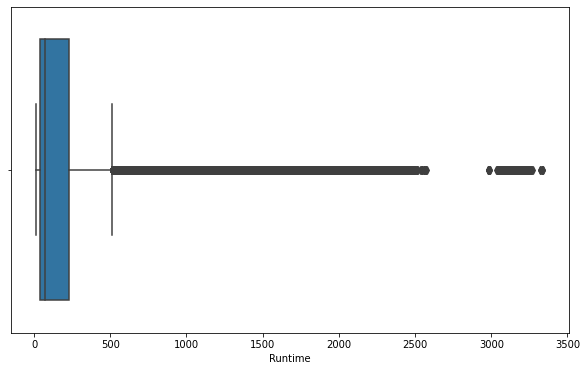

In [ ]:
plt.figure(figsize=(10,6))


sns.boxplot(dataset['Runtime'])

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Runtime']]])

,variables,VIF
0,MWG,5.570888
1,NWG,5.570888
2,KWG,9.434536
3,MDIMC,4.761904
4,NDIMC,4.761904
5,MDIMA,4.822777
6,NDIMB,4.822777
7,KWI,3.479154
8,VWM,3.097287
9,VWN,3.097287


In [ ]:
dataset.Runtime.value_counts()

38.7600     26
40.4075     23
39.8450     22
38.0000     21
38.7975     21
            ..
179.8350     1
217.9675     1
289.2675     1
213.1850     1
310.8625     1
Name: Runtime, Length: 131488, dtype: int64

## **Feature Selection**

In [ ]:
#Feature selection
features = dataset.describe().columns
features = features[:-1]
features

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

## **Model Implementation**

In [ ]:
#Initialising x & y variable
from scipy.stats import zscore
x = dataset[features]

In [ ]:
y = np.log10(dataset['Runtime'])

In [ ]:
#using train_test_split split the dataset as per model requires
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=0)
print(x_train.shape, x_test.shape)

(48320, 14) (193280, 14)


## **Linear Regression**

In [ ]:
#Fiting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.5608712415708204

In [ ]:
reg.coef_

array([ 0.00582064,  0.00465896,  0.0056554 , -0.02468241, -0.02373291,
       -0.00010456, -0.00033802, -0.001593  , -0.00489541, -0.01185042,
       -0.05966742, -0.0046331 , -0.08259371, -0.02042852])

In [ ]:
len(reg.coef_)

14

In [ ]:
reg.intercept_

1.835185411568166

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([2.43920351, 1.89860855, 2.06314111, ..., 2.05367179, 2.45847917,
       2.55131601])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
RSME = np.sqrt(MSE)
print('MSE: ',MSE)
print('RSME: ',RSME)

MSE:  0.10542589029995043
RSME:  0.32469353288901587


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

R2 : 0.5611442458312612
Adjusted R2 :  0.5611124553851983


In [ ]:
"""plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(['predicted','Actual'])
plt.show()"""

"plt.figure(figsize=(10,5))\nplt.plot(y_pred)\nplt.plot(np.array(y_test))\nplt.legend(['predicted','Actual'])\nplt.show()"

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.5608705273809234

In [ ]:
lasso.coef_

array([ 0.00581984,  0.00465812,  0.00565354, -0.02467856, -0.02372929,
       -0.00010206, -0.00033573, -0.001582  , -0.00485743, -0.0118135 ,
       -0.0592682 , -0.00422794, -0.08218949, -0.02002369])

## **Regularization**

In [ ]:
### Cross validation
#Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.10551703811320397


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

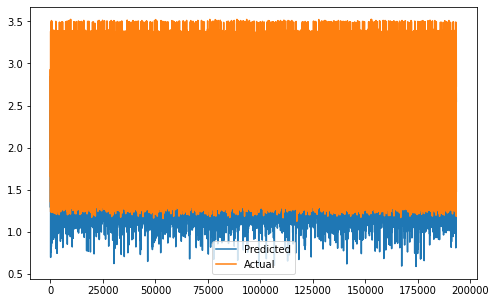

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred_lasso)
RSME = np.sqrt(MSE)
print("MSE: ",MSE)
print("RSME", RSME)

MSE:  0.10542589029995043
RSME 0.32469353288901587


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

R2 : 0.5611442458312612
Adjusted R2 :  0.5611124553851983


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [ ]:
### Cross validation
#Ridge
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.10554204489943263


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)

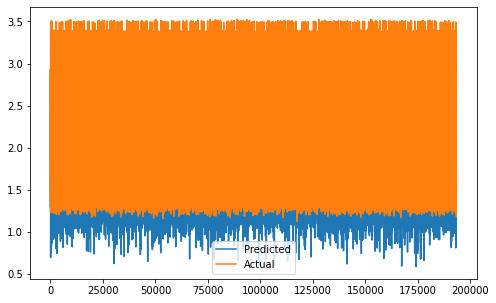

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred_ridge)
RSME = np.sqrt(MSE)
print("MSE: ",MSE)
print("RSME", RSME)

MSE:  0.10542583813305254
RSME 0.32469345255648835


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

R2 : 0.5611444629861105
Adjusted R2 :  0.5611124553851983


In [ ]:
### Cross validation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)


In [ ]:
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(x_train, y_train)

0.5466009321156478

In [ ]:
y_pred_ela = elasticnet.predict(x_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred_ela)
RSME = np.sqrt(MSE)
print("MSE: ",MSE)
print("RSME", RSME)

MSE:  0.10861655543663322
RSME 0.32957025872586443


In [ ]:
r2_ele = r2_score(y_test, y_pred_ela)
print("R2 :" ,r2_ele)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ela))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

R2 : 0.5478624822068332
Adjusted R2 :  0.5478297296378263


In [ ]:
### Cross validation
elastic=ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
elastic_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.10554204489943263


In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)

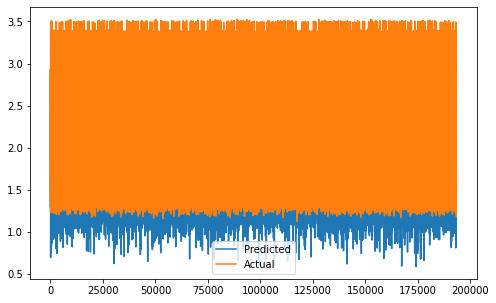

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE = mean_squared_error(y_test, y_pred_elastic)
RSME = np.sqrt(MSE)
print("MSE: ",MSE)
print("RSME", RSME)

MSE:  0.10542583813305254
RSME 0.32469345255648835


In [ ]:

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

R2 : 0.5611444629861105
Adjusted R2 :  0.5611124553851983


## **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred_poly = lr.predict(x_test_trans)
R2_poly=r2_score(y_test, y_pred_poly)
print(R2_poly)

0.8135564787329411


In [ ]:
lr.coef_

array([ 8.73767830e-16,  3.34230884e-03, -5.86316870e-05,  1.68496495e-06,
       -1.46053462e-02, -1.37677611e-02, -2.65153811e-03, -3.64626943e-03,
       -1.76273676e-05, -6.25919691e-02, -4.93498849e-02, -3.41225414e-02,
        3.61967005e-03, -5.24879836e-02, -1.50432289e-02,  2.47233268e-05,
        5.88929286e-05,  2.69932317e-06, -3.07979794e-04, -2.59259263e-04,
        4.33206586e-06,  2.43525846e-05,  5.71327446e-05, -7.83012643e-06,
        2.43885395e-04, -9.93920263e-04,  2.70714142e-04,  7.29481216e-04,
        3.51644842e-04,  3.81404463e-05, -8.96857449e-07, -2.95508537e-04,
       -3.42799179e-04,  2.17434853e-05,  4.30988934e-06, -4.84389400e-06,
        1.80339841e-04,  9.16584567e-05,  1.06142245e-03, -2.67594080e-04,
        1.22295141e-03,  1.15579777e-03,  8.08783179e-05, -2.28615169e-04,
       -2.62545021e-04,  2.50780579e-05,  1.42159388e-05,  9.83965728e-05,
        2.45238168e-04,  6.02938791e-05,  4.41300564e-04,  1.29526080e-04,
        4.98861512e-03,  

In [ ]:
lr.intercept_

2.144538021746841

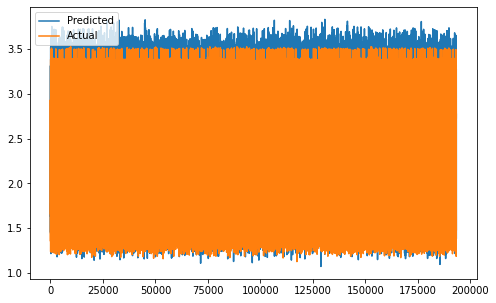

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_poly)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## **Decision Tree Implementation**

In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 72 kB 896 kB/s 


In [ ]:
import sys
import os
#adding library to pythonpath
sys.path.append(f"{os.getcwd()}/.../")

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.datasets import *
from dtreeviz.trees import *


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([2.92028511, 1.55025894, 1.83287599, ..., 2.21036535, 2.54517099,
       2.73259478])

In [ ]:
y_test

111345    2.923178
62516     1.548389
143068    1.833004
152967    1.615687
223400    2.695066
            ...   
21947     1.622835
168858    1.609221
87303     2.215195
233096    2.544827
206877    2.731651
Name: Runtime, Length: 193280, dtype: float64

In [ ]:
#measure the score
R2_dt=r2_score(y_test, y_pred_dt)
print(R2_dt)

0.994462087478873


In [ ]:
dataset.iloc[-1]

MWG        128.0000
NWG        128.0000
KWG         32.0000
MDIMC       32.0000
NDIMC       32.0000
MDIMA       32.0000
NDIMB       32.0000
KWI          8.0000
VWM          4.0000
VWN          4.0000
STRM         1.0000
STRN         1.0000
SA           1.0000
SB           1.0000
Runtime     17.8175
Name: 241599, dtype: float64

In [ ]:
#Visulizing the decision tree
#viz = dtreeviz(dt,x_data=x_train,y_data=y_train,target_name='Runtime',feature_names=features,title='decesion tree',show_node_labels=True)

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [ ]:
#hyper parameter grid
para_dict = {
             'max_depth':[4,6,8],
             
             
             }
para_dict

{'max_depth': [4, 6, 8]}

In [ ]:
rf_model=RandomForestRegressor()

In [ ]:
rf_grid=GridSearchCV(estimator=rf_model, param_grid=para_dict, cv=5, verbose=2)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ........................................max_depth=4; total time=   2.8s
[CV] END ........................................max_depth=4; total time=   2.6s
[CV] END ........................................max_depth=4; total time=   4.0s
[CV] END ........................................max_depth=4; total time=   4.9s
[CV] END ........................................max_depth=4; total time=   7.4s
[CV] END ........................................max_depth=6; total time=   7.2s
[CV] END ........................................max_depth=6; total time=   7.5s
[CV] END ........................................max_depth=6; total time=   3.6s
[CV] END ........................................max_depth=6; total time=   3.5s
[CV] END ........................................max_depth=6; total time=   3.5s
[CV] END ........................................max_depth=8; total time=   4.4s
[CV] END ........................................

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8]}, verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8)

In [ ]:
rf_grid.best_params_

{'max_depth': 8}

In [ ]:
rf_grid.best_score_

0.9536609651131134

In [ ]:
y_pred_rf=rf_grid.best_estimator_.predict(x_test)
y_pred_rf

array([2.94312327, 1.65109171, 1.88185644, ..., 2.26257805, 2.48727826,
       2.7657852 ])

In [ ]:
y_test

111345    2.923178
62516     1.548389
143068    1.833004
152967    1.615687
223400    2.695066
            ...   
21947     1.622835
168858    1.609221
87303     2.215195
233096    2.544827
206877    2.731651
Name: Runtime, Length: 193280, dtype: float64

In [ ]:
R2_rf=r2_score(y_test,y_pred_rf)
print(R2_rf)

0.9536118849785813


## **Model Comparision**

<BarContainer object of 5 artists>

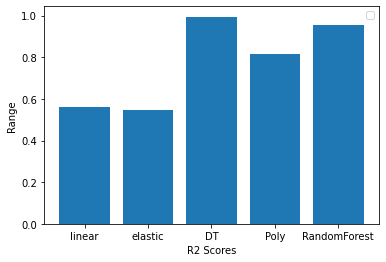

In [ ]:
comparision=[r2,r2_ele,R2_dt,R2_poly,R2_rf]
names=['linear','elastic','DT','Poly','RandomForest']
x=np.arange(len(comparision))
plt.xlabel('R2 Scores')
plt.ylabel('Range')
plt.legend()
plt.xticks(x,names)
plt.bar(x,comparision)


# **Model Explainability**

In [ ]:
#Feature Importance
importances=rf_grid.best_estimator_.feature_importances_
importances

array([2.80587090e-01, 2.41576696e-01, 9.14795208e-03, 1.94342944e-01,
       2.11008390e-01, 5.48690317e-05, 5.78809130e-06, 1.02331931e-03,
       7.63024337e-03, 3.23030490e-03, 1.09234259e-02, 4.78089599e-05,
       2.72094022e-02, 1.32117657e-02])

In [ ]:
importence_dict = {'Feature':list(features), 'Feature Importance':importances}

In [ ]:
importance_df=pd.DataFrame(importence_dict)
importance_df

,Feature,Feature Importance
0,MWG,0.280587
1,NWG,0.241577
2,KWG,0.009148
3,MDIMC,0.194343
4,NDIMC,0.211008
5,MDIMA,0.000055
6,NDIMB,0.000006
7,KWI,0.001023
8,VWM,0.007630
9,VWN,0.003230


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,MWG,0.280587
1,NWG,0.241577
4,NDIMC,0.211008
3,MDIMC,0.194343
12,SA,0.027209
13,SB,0.013212
10,STRM,0.010923
2,KWG,0.009148
8,VWM,0.007630
9,VWN,0.003230


# **SHAP**

In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q shap

     |████████████████████████████████| 575 kB 6.4 MB/s 


In [ ]:
# Feature Importance using SHAP
import shap
sns.set_style('darkgrid')

In [ ]:
shap.initjs()
explained = shap.TreeExplainer(dt)
shap_values = explained.shap_values(x_test.iloc[0])
shap.force_plot(explained.expected_value, shap_values, x_test.iloc[0])

In [ ]:
x_test.iloc[0]

MWG       64
NWG      128
KWG       16
MDIMC      8
NDIMC      8
MDIMA      8
NDIMB     16
KWI        8
VWM        1
VWN        2
STRM       0
STRN       0
SA         0
SB         1
Name: 111345, dtype: int64

In [ ]:
x_test.mean()

MWG      80.429636
NWG      80.463245
KWG      25.526242
MDIMC    13.936217
NDIMC    13.947185
MDIMA    17.382450
NDIMB    17.362997
KWI       5.000124
VWM       2.449948
VWN       2.451868
STRM      0.499943
STRN      0.499824
SA        0.500021
SB        0.500228
dtype: float64

## **Conclusion**

1. SGEMM GPU Kernel Performance is measured on running time by its arithmetic calculation (Matrix A * Matrix B = Matrix C). Using some machine learning regression algorithms implemented to predict the response variable.
2. Using Multivariate Linear Regression which gives 0.56 R2_score and also all the regularization techniques gives almost the same prediction of linear Regression which includes hyper tuning.
3. Understanding the dataset (Curvilinear) implemented Polynomial Regression which gives 0.81 R2_score.
4. Observed features of objects implemented in a Decision Tree gives 0.99 R2_score which may lead to overfitting.
5. To control overfitting implemented Random Forest techniques with hyperparameter tuning are improved predicting the output accuracy and the R2_score is 0.95. 